In [1]:
import pandas as pd
from cl_cpmm import ConcentratedLiquidity
import os

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [2]:
direct = '/Volumes/luke-uni/data/uniswap-v3/NFT_manager'
dfs = []
for file in os.listdir(direct):
    tdf = pd.read_parquet(f'{direct}/{file}')
    dfs.append(tdf)
nft = pd.concat(dfs)


In [3]:
nft.rename({'args.tokenId':'tokenId', 'args.liquidity':'liquidity'}, axis=1, inplace=True)

In [4]:
nft

,event,logIndex,transactionIndex,transactionHash,address,blockHash,blockNumber,tokenId,liquidity,args.amount0,args.amount1,args.recipient,args.from,args.to,args.owner,args.approved,args.operator
0,DecreaseLiquidity,218,161,0xfdf8fb54828dc8a28bc0623f71f213118683a5ef02fd329b5d868ae0395e2577,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,0x26ff7321f0c5642b73c35dbd334c93a98585b2f7cc7122dcf89f693d4503f85c,13000001,108859.0,3.861221e+20,6.497390e+21,1.967607e+18,nan,nan,nan,nan,nan,nan
1,Collect,222,161,0xfdf8fb54828dc8a28bc0623f71f213118683a5ef02fd329b5d868ae0395e2577,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,0x26ff7321f0c5642b73c35dbd334c93a98585b2f7cc7122dcf89f693d4503f85c,13000001,108859.0,NaN,6.497390e+21,1.967607e+18,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,nan,nan,nan,nan,nan
2,Transfer,438,288,0x61ae78f150a50d2f145779200bee946c5a36c54c04fe1dbba504815607ce0096,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,0xb21a33c3fb4904f52f7391734bbc9dd12678223c9377f38ef39f1760dad8b6c2,13000011,108867.0,NaN,NaN,NaN,nan,0x0000000000000000000000000000000000000000,0x1bB1EDfbF2D183Dbaf32557C63b6454daEc2A0e2,nan,nan,nan
3,IncreaseLiquidity,439,288,0x61ae78f150a50d2f145779200bee946c5a36c54c04fe1dbba504815607ce0096,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,0xb21a33c3fb4904f52f7391734bbc9dd12678223c9377f38ef39f1760dad8b6c2,13000011,108867.0,4.740894e+21,1.766912e+22,9.869782e+18,nan,nan,nan,nan,nan,nan
4,DecreaseLiquidity,194,109,0x6ebed710fd89ddf67df094fa55c67574f02f2068aa33611d5748c18e727394c4,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,0x29e05b6a260eab7b5eb7b1ded4db944cecb6d41217a0722946400d2cdb57265c,13000015,108202.0,1.586446e+21,1.087168e+22,4.955736e+18,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469584,DecreaseLiquidity,75,76,0xdc27e19a57fef980b6b6e3266c66010d65754271709316164bbd26dfafd3da88,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,0xac0225e6e9657855edde02b1f6acff0d4a25ef8428c3e00af77616e632be8811,12999997,108659.0,2.745068e+16,6.094059e+16,9.608252e+14,nan,nan,nan,nan,nan,nan
469585,Collect,80,76,0xdc27e19a57fef980b6b6e3266c66010d65754271709316164bbd26dfafd3da88,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,0xac0225e6e9657855edde02b1f6acff0d4a25ef8428c3e00af77616e632be8811,12999997,108659.0,NaN,6.129241e+16,9.660503e+14,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,nan,nan,nan,nan,nan
469586,DecreaseLiquidity,331,209,0x6aa8a423c336ba58fa770a72d9629ab4cf8d82856e0b5329713a9ef24d487c17,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,0xa7494c5e38ffb0bcd279caf1ccbcad3aea47a3cf03213fd1364fbafdca706973,12999999,13665.0,6.409322e+21,1.756688e+22,0.000000e+00,nan,nan,nan,nan,nan,nan
469587,Collect,335,209,0x6aa8a423c336ba58fa770a72d9629ab4cf8d82856e0b5329713a9ef24d487c17,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,0xa7494c5e38ffb0bcd279caf1ccbcad3aea47a3cf03213fd1364fbafdca706973,12999999,13665.0,NaN,1.766912e+22,8.488901e+17,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,nan,nan,nan,nan,nan


In [5]:
nft['event'] = nft['event'].mask(nft['event'] == 'IncreaseLiquidity', 'Mint')
nft['event'] = nft['event'].mask(nft['event'] == 'DecreaseLiquidity', 'Burn')

In [6]:
pools = pd.read_csv('./pools/top250.csv', index_col=[0])

In [7]:
pools.loc[pools['volumeUSD'].isin(pools['volumeUSD'].nsmallest(10))]

,index,pool_id,pool_name,volumeUSD
240,4933,0x93c212b82c41dc99ba8ff5b21e03946da567ae6f,SHIT/ETH 1.0%,1.175592e+08
241,2943,0x59b4bb1f5d943cf71a10df63f6b743ee4a4489ee,XMON/ETH 1.0%,1.159244e+08
242,3556,0x6ae0cdc5d2b89a8dcb99ad6b3435b3e7f7290077,KROM/ETH 0.3%,1.156376e+08
243,8448,0xfcfdfc98062d13a11cec48c44e4613eb26a34293,ETH/COW 1.0%,1.151995e+08
244,606,0x129360c964e2e13910d603043f6287e5e9383374,OUSD/USDT 0.05%,1.151025e+08
245,2104,0x3ffedcddd268511acc44ae67845bdd56c8417fa4,BTC/FUN 0.01%,1.148874e+08
246,1540,0x2e8daf55f212be91d3fa882cceab193a08fddeb2,YFI/ETH 1.0%,1.147150e+08
247,352,0x0a55882f4e1117adc54afbbac4a39079ad52fb89,SSV/ETH 0.3%,1.147087e+08
248,5892,0xb11d15da84a206670beba4e8172c69e653516e80,FLOKI/ETH 0.3%,1.135728e+08
249,4746,0x8e794abe66a4f65c0b6369ceb91af9d50d78fbfa,UFO/ETH 1.0%,1.129690e+08


In [8]:
ADDRESS = '0x0a55882f4e1117adc54afbbac4a39079ad52fb89' #'0x0a55882f4e1117adc54afbbac4a39079ad52fb89' #'0x68082ecc5bbad8fe77c2cb9d0e3403d9a00ccbc2'

In [9]:
meta_pool_data = pools.loc[pools['pool_id'] == ADDRESS]

In [10]:
pool_name = meta_pool_data.pool_name.values[0] 

In [11]:
fee = pool_name.split(' ')[-1]

In [12]:
if fee == '1.0%':
    FEE = 10000
    TICK_SPACING = 200

elif fee == '0.3%':
    FEE = 3000
    TICK_SPACING = 60

elif fee == '0.05%':
    FEE = 500
    TICK_SPACING = 10

elif fee == '0.01%':
    FEE = 100
    TICK_SPACING = 1

In [13]:
direct = f'/Volumes/luke-uni/data/uniswap-v3/raw/{ADDRESS}'
dfs = []
for file in os.listdir(direct):
    tdf = pd.read_parquet(f'{direct}/{file}')
    dfs.append(tdf)
df = pd.concat(dfs)
df.drop_duplicates(inplace=True)
df.sort_values(by = ['blockNumber', 'logIndex'], inplace=True)
df

,event,logIndex,transactionIndex,transactionHash,address,blockHash,blockNumber,args.sqrtPriceX96,args.tick,args.owner,args.tickLower,args.tickUpper,args.sender,args.amount,args.amount0,args.amount1,args.recipient,args.liquidity,args.observationCardinalityNextOld,args.observationCardinalityNextNew,args.paid0,args.paid1
0,Initialize,283,248,0xcf0c8169044407bdf4dcdf88d40134a1b78681d42ea0eff3ad1d7f90b8c2b01e,0x0A55882F4E1117ADc54aFbbac4A39079AD52fB89,0x5c33c85ab8ece9384d802d9af734191885bad0503835ba2c472ad848822ab719,13465224,6.136839e+27,-51163.0,nan,NaN,NaN,nan,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN
1,Mint,288,248,0xcf0c8169044407bdf4dcdf88d40134a1b78681d42ea0eff3ad1d7f90b8c2b01e,0x0A55882F4E1117ADc54aFbbac4A39079AD52fB89,0x5c33c85ab8ece9384d802d9af734191885bad0503835ba2c472ad848822ab719,13465224,NaN,NaN,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,-53400.0,-44220.0,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,1.320505e+19,5.000000e+19,1.082329e+17,nan,NaN,NaN,NaN,NaN,NaN
2,Swap,508,291,0xc2e0862d6ea34405727e495971844134f06fbb1f594994bad2b7a1833be6afb7,0x0A55882F4E1117ADc54aFbbac4A39079AD52fB89,0xfc3a7ad19be0ebd7e40cce900a386c304119d90df787846b1dea8ae2aead1980,13465680,6.316294e+27,-50587.0,nan,NaN,NaN,0xE592427A0AEce92De3Edee1F18E0157C05861564,NaN,-4.843603e+18,3.000000e+16,0x50542121cc2612752C2cbe2155550844Fd821167,1.320505e+19,NaN,NaN,NaN,NaN
3,Swap,72,42,0x7630d84cb91ffd4dc7183055ae00d8525fdb3b7808d0e8f59df50e389dc8af79,0x0A55882F4E1117ADc54aFbbac4A39079AD52fB89,0xd485afdb8e2ef061e7cfee621d681a0ec2622e91c8438a4f969964c9b9e3fa33,13465705,6.615386e+27,-49662.0,nan,NaN,NaN,0xE592427A0AEce92De3Edee1F18E0157C05861564,NaN,-7.488707e+18,5.000000e+16,0x577176494B48cE860d8a0252ee70C1E6CC526BA0,1.320505e+19,NaN,NaN,NaN,NaN
4,Swap,221,175,0xd03a5b27814eafb6cbc095d636a3cb580f37b79dc9006905408dc2120176e743,0x0A55882F4E1117ADc54aFbbac4A39079AD52fB89,0xa989e1e771ba71ff8b1f41ed0d601b9d28a2c4ba235b4385bbebbb63cf0f3300,13465759,7.751934e+27,-46491.0,nan,NaN,NaN,0xE592427A0AEce92De3Edee1F18E0157C05861564,NaN,-2.318690e+19,1.900000e+17,0x9A4dd52D7a7F5585D66660F6A84b792E8a0E7C7a,1.320505e+19,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14190,Swap,4,1,0x310627955d5d2b3608c2fe0e6f7265b654e821065b7b16254e82698639853f69,0x0A55882F4E1117ADc54aFbbac4A39079AD52fB89,0x32ca499208bd9e1782f0ca0427d43208390c8e40a45e889601cb81c697865c79,16998114,1.122505e+28,-39086.0,nan,NaN,NaN,0x98C3d3183C4b8A650614ad179A1a98be0a8d6B8E,NaN,7.774741e+19,-1.560073e+18,0x98C3d3183C4b8A650614ad179A1a98be0a8d6B8E,4.164983e+21,NaN,NaN,NaN,NaN
14191,Swap,154,49,0xb8203a654ac80714a674805f2bf8699da35e79e0cb6b6506ef132b7dbf16369b,0x0A55882F4E1117ADc54aFbbac4A39079AD52fB89,0x9e7ec9f9a36b8d905f1353d0157dc214612c41ba9b9c5d0cd37ec1dcef51fdda,16998587,1.122603e+28,-39084.0,nan,NaN,NaN,0xDef1C0ded9bec7F1a1670819833240f027b25EfF,NaN,-2.567198e+18,5.169150e+16,0xe66B31678d6C16E9ebf358268a790B763C133750,4.164983e+21,NaN,NaN,NaN,NaN
14192,Swap,68,26,0x1f98ad403d6d19be2f3fdd5aa9be2b9272a1a6952996b5b869949dbdf49c363e,0x0A55882F4E1117ADc54aFbbac4A39079AD52fB89,0x7102de6cdaed43c8d529c2af6adda9fe633e291bef7581cadaffb460c512c0f1,16998626,1.122506e+28,-39086.0,nan,NaN,NaN,0xE592427A0AEce92De3Edee1F18E0157C05861564,NaN,2.541526e+18,-5.086805e+16,0x22F9dCF4647084d6C31b2765F6910cd85C178C18,4.164983e+21,NaN,NaN,NaN,NaN
14193,Swap,65,15,0x808f64d03c2ca3b7de7165018417e8caaf0a409bf0ed2b272c64756cca832536,0x0A55882F4E1117ADc54aFbbac4A39079AD52fB89,0x81c19753708cf8b9f4814e3c8e9cf4e2afc090b1d7adbdd0d322b0c979865b6f,16999210,1.119956e+28,-39132.0,nan,NaN,NaN,0x98C3d3183C4b8A650614ad179A1a98be0a8d6B8E,NaN,6.713604e+19,-1.340544e+18,0x98C3d3183C4b8A650614ad179A1a98be0a8d6B8E,4.164983e+21,NaN,NaN,NaN,NaN


In [14]:
#Mint -2 #if theres a transfer there 
#Mint -1 #if no tfer
#For mints group by txn and take min(logIndex) - 1  

#Burn -1
#clean burns that have amount, amount0, amount1 as 0,0,0

#Collect -1

In [15]:
df = df.merge(nft[['transactionHash', 'tokenId', 'event']].loc[nft['event'].isin(['Collect', 'Mint', 'Burn'])], on= ['transactionHash', 'event'], how='left')

In [16]:
#clean for null burns
df.drop(df.loc[(df['event'] == 'Burn')&(df['args.amount'] == 0)&(df['args.amount0'] == 0)&(df['args.amount1'] == 0)].index, inplace=True)

In [17]:
df.sort_values(['blockNumber', 'logIndex'], inplace=True)

In [18]:
POOL = pool_name.split(' ')[0] #Pool address, can be a str with anything 
TOKEN0 = POOL.split('/')[0] #Token0 name or address
TOKEN1 = POOL.split('/')[1] #Token1 name or address

In [19]:
POOL, TOKEN0, TOKEN1, FEE, TICK_SPACING

('SSV/ETH', 'SSV', 'ETH', 3000, 60)

In [20]:
clm = ConcentratedLiquidity(TOKEN0, TOKEN1, POOL, fee = FEE, tickSpacing = TICK_SPACING, protocol_fee = 0) #init pool object

In [21]:
position_updates = clm.replay_from_logs_for_LP_profit(df, tolerance=0.01, pass_error=True)

/Users/lukejohnson/Desktop/AMM Liquidity Analysis/amm-liquidity/pools/cl_cpmm/cl_cpmm.py:195: UserWarning: 
Burn event resulted in negative liquidity. Has been set to 0
  warnings.warn(f"\nBurn event resulted in negative liquidity. Has been set to 0")
/Users/lukejohnson/Desktop/AMM Liquidity Analysis/amm-liquidity/pools/cl_cpmm/cl_cpmm.py:195: UserWarning: 
Burn event resulted in negative liquidity. Has been set to 0
  warnings.warn(f"\nBurn event resulted in negative liquidity. Has been set to 0")


In [32]:
position_updates

,tokenId,last_L,start_L,increase_L,tickLower,tickUpper,owner,start_token0_holdings,start_token1_holdings,increase_token0_holdings,increase_token1_holdings,last_token0_holdings,last_token1_holdings,token0_fees_accrued,token1_fees_accrued,token0_collected,token1_collected,start_logIndex,start_blockNumber,start_transactionIndex,start_transactionHash,last_logIndex,last_blockNumber,last_transactionIndex,last_transactionHash
0,144454.0,1.320505e+19,1.320505e+19,0.000000e+00,-53400.0,-44220.0,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,5.000000e+19,1.082329e+17,0.000000e+00,0.000000e+00,4.515640e+19,1.381429e+17,0.000000e+00,9.000000e+13,0.000000e+00,0.000000e+00,288,13465224,248,0xcf0c8169044407bdf4dcdf88d40134a1b78681d42ea0eff3ad1d7f90b8c2b01e,508,13465680,291,0xc2e0862d6ea34405727e495971844134f06fbb1f594994bad2b7a1833be6afb7
0,144454.0,1.320505e+19,1.320505e+19,0.000000e+00,-53400.0,-44220.0,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,5.000000e+19,1.082329e+17,0.000000e+00,0.000000e+00,3.766769e+19,1.879929e+17,0.000000e+00,2.400000e+14,0.000000e+00,0.000000e+00,288,13465224,248,0xcf0c8169044407bdf4dcdf88d40134a1b78681d42ea0eff3ad1d7f90b8c2b01e,72,13465705,42,0x7630d84cb91ffd4dc7183055ae00d8525fdb3b7808d0e8f59df50e389dc8af79
0,144454.0,1.320505e+19,1.320505e+19,0.000000e+00,-53400.0,-44220.0,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,5.000000e+19,1.082329e+17,0.000000e+00,0.000000e+00,1.448079e+19,3.774229e+17,0.000000e+00,8.100000e+14,0.000000e+00,0.000000e+00,288,13465224,248,0xcf0c8169044407bdf4dcdf88d40134a1b78681d42ea0eff3ad1d7f90b8c2b01e,221,13465759,175,0xd03a5b27814eafb6cbc095d636a3cb580f37b79dc9006905408dc2120176e743
0,144454.0,1.320505e+19,1.320505e+19,0.000000e+00,-53400.0,-44220.0,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,5.000000e+19,1.082329e+17,0.000000e+00,0.000000e+00,6.300428e+19,3.574068e+16,1.460085e+17,8.100000e+14,0.000000e+00,0.000000e+00,288,13465224,248,0xcf0c8169044407bdf4dcdf88d40134a1b78681d42ea0eff3ad1d7f90b8c2b01e,39,13465808,38,0xbf811d0987ddedad16685b4d51e46360a373bc56970d7f93073b9ef2e5f7c53b
0,144454.0,1.320505e+19,1.320505e+19,0.000000e+00,-53400.0,-44220.0,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,5.000000e+19,1.082329e+17,0.000000e+00,0.000000e+00,4.098342e+19,1.653507e+17,1.460085e+17,1.200000e+15,0.000000e+00,0.000000e+00,288,13465224,248,0xcf0c8169044407bdf4dcdf88d40134a1b78681d42ea0eff3ad1d7f90b8c2b01e,252,13465939,182,0x5a88804b600f1aa4daaedae30b5558b96dc99aa3dd97ff1385d784e28f095436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,455451.0,4.267050e+18,4.267050e+18,4.267050e+18,-41040.0,-27540.0,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,1.000000e+19,1.283601e+17,0.000000e+00,0.000000e+00,1.331808e+19,5.408480e+16,5.003574e+17,1.120286e+16,0.000000e+00,0.000000e+00,249,16739199,86,0xb56007f178ff4deb9fd663d03b03fa8ef21a50b77d50841b6a401e08f82f47eb,32,16999777,25,0x37bc9a8a753b65b75f6f3c1c9e8708137fad296c065845cd9e77b7b963fdd1ee
60,459013.0,1.801103e+19,1.728146e+19,1.801103e+19,-40140.0,-33600.0,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,1.570270e+19,4.318567e+17,1.017647e+18,9.957738e+15,3.095664e+19,1.217749e+17,1.479254e+18,3.144583e+16,1.017647e+18,2.204277e+16,206,16782088,100,0x2b2c58400bfe9f66777d07d554a01ca2d0a279f7e2fd7cbe21db010c2aa78205,32,16999777,25,0x37bc9a8a753b65b75f6f3c1c9e8708137fad296c065845cd9e77b7b963fdd1ee
62,460274.0,3.276800e+04,2.222576e+20,3.276800e+04,-44520.0,-30660.0,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,4.246340e+20,9.975208e+18,4.767485e+18,8.963850e+16,8.035266e+04,1.087715e+03,1.013935e+19,2.228589e+17,5.050355e+20,8.823402e+18,139,16795541,86,0xca8c7d11347f91c32e2fe1874e9f44591cff77ce5c468fa645063b37b03fca6d,32,16999777,25,0x37bc9a8a753b65b75f6f3c1c9e8708137fad296c065845cd9e77b7b963fdd1ee
65,471725.0,1.349024e+20,1.349024e+20,1.349024e+20,-45480.0,-33420.0,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,2.278319e+20,5.372528e+18,0.000000e+00,0.000000e+00,2.383492e+20,5.160609e+18,4.219981e+18,8.61272

In [33]:
example_pos = position_updates.loc[20]
example_pos

,tokenId,last_L,start_L,increase_L,tickLower,tickUpper,owner,start_token0_holdings,start_token1_holdings,increase_token0_holdings,increase_token1_holdings,last_token0_holdings,last_token1_holdings,token0_fees_accrued,token1_fees_accrued,token0_collected,token1_collected,start_logIndex,start_blockNumber,start_transactionIndex,start_transactionHash,last_logIndex,last_blockNumber,last_transactionIndex,last_transactionHash
20,270462.0,7.065568e+20,7.065568e+20,0.000000e+00,-55440.0,-51360.0,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,0.0,1.000000e+19,0.0,0.0,0.000000e+00,1.000000e+19,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,188,15164312,100,0x46c6d4a3ca60adda07506c411afb7c264612830ce0ea292c24071208ef37ded3,51,15164563,31,0xc0ec6ee9a3db670137fbd3fa13f78922b90d03016f17c465009892f571b95ff9
20,270462.0,7.065568e+20,7.065568e+20,0.000000e+00,-55440.0,-51360.0,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,0.0,1.000000e+19,0.0,0.0,4.394093e+18,9.974163e+18,1.322194e+16,0.000000e+00,0.000000e+00,0.000000e+00,188,15164312,100,0x46c6d4a3ca60adda07506c411afb7c264612830ce0ea292c24071208ef37ded3,135,15165363,49,0xcc3d698fbe2579184903f369cda821a34cb3bd1cbaf80f0e385afe10c1cac4aa
20,270462.0,7.065568e+20,7.065568e+20,0.000000e+00,-55440.0,-51360.0,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,0.0,1.000000e+19,0.0,0.0,3.132362e+19,9.816358e+18,9.425362e+16,0.000000e+00,0.000000e+00,0.000000e+00,188,15164312,100,0x46c6d4a3ca60adda07506c411afb7c264612830ce0ea292c24071208ef37ded3,25,15165386,25,0x286ca6c851e06cc25b9eae2b7ddc983128819cad2801d4cc5ae8820f42716ef1
20,270462.0,7.065568e+20,7.065568e+20,0.000000e+00,-55440.0,-51360.0,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,0.0,1.000000e+19,0.0,0.0,6.978273e+19,9.592577e+18,2.099781e+17,0.000000e+00,0.000000e+00,0.000000e+00,188,15164312,100,0x46c6d4a3ca60adda07506c411afb7c264612830ce0ea292c24071208ef37ded3,347,15165431,173,0xecbcfaa657dffa1284ad8e7ffb30091ec5a28bf0f6da8b93073f8a495b875575
20,270462.0,7.065568e+20,7.065568e+20,0.000000e+00,-55440.0,-51360.0,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,0.0,1.000000e+19,0.0,0.0,8.934418e+19,9.479465e+18,2.688390e+17,0.000000e+00,0.000000e+00,0.000000e+00,188,15164312,100,0x46c6d4a3ca60adda07506c411afb7c264612830ce0ea292c24071208ef37ded3,269,15165893,192,0x614ecae677d331dc82984cbcca0553b60f830b12cd37042086fc215feb09e7a1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,270462.0,7.065568e+20,7.065568e+20,7.065568e+20,-55440.0,-51360.0,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,0.0,1.000000e+19,0.0,0.0,5.318730e+19,9.688912e+18,9.609044e+19,4.969161e+17,0.000000e+00,0.000000e+00,188,15164312,100,0x46c6d4a3ca60adda07506c411afb7c264612830ce0ea292c24071208ef37ded3,61,15375968,24,0x9072a848c0c76cafa4440f0634395e916ecbbce9f62e12e8019b1ce2270238aa
20,270462.0,7.065568e+20,7.065568e+20,7.065568e+20,-55440.0,-51360.0,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,0.0,1.000000e+19,0.0,0.0,1.295082e+19,9.923921e+18,9.609044e+19,4.976232e+17,0.000000e+00,0.000000e+00,188,15164312,100,0x46c6d4a3ca60adda07506c411afb7c264612830ce0ea292c24071208ef37ded3,57,15376039,12,0xfa037f5f003fe977b5c8590953ad673cc46dd4d12e9c7e31fef60e3895c10310
20,270462.0,7.065568e+20,7.065568e+20,7.065568e+20,-55440.0,-51360.0,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,0.0,1.000000e+19,0.0,0.0,0.000000e+00,1.000000e+19,9.609044e+19,4.978522e+17,0.000000e+00,0.000000e+00,188,15164312,100,0x46c6d4a3ca60adda07506c411afb7c264612830ce0ea292c24071208ef37ded3,140,15376239,38,0x851637e77b80380a78bf58eaa4f7397c7ecd445217703e170e88b0ad8c90d53d
20,270462.0,0.000000e+00,7.065568e+20,7.065568e+20,-55440.0,-51360.0,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,0.0,1.000000e+19,0.0,0.0,0.000000e+00,1.000000e+19,9.609044e+19,4.978522e+17,0.000000e+00,0.000000e+00,188,15164312,100,0x46c6d4a3ca60adda07506c411afb7c264612830ce0ea292c24071208ef37ded3,427,15603759,170,0xcad12dbe615fcdad1f0b7e23ac1337f94af239d4ad525e2f7e2295aa2b251da1


In [34]:
example_pos.reset_index(inplace=True)

<Axes: >

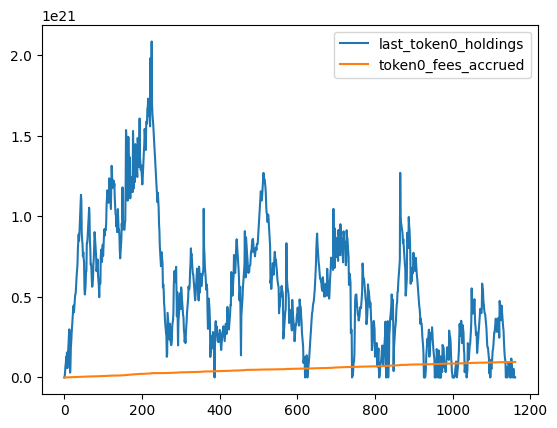

In [35]:
example_pos[['last_token0_holdings', 'token0_fees_accrued']].plot()

<Axes: >

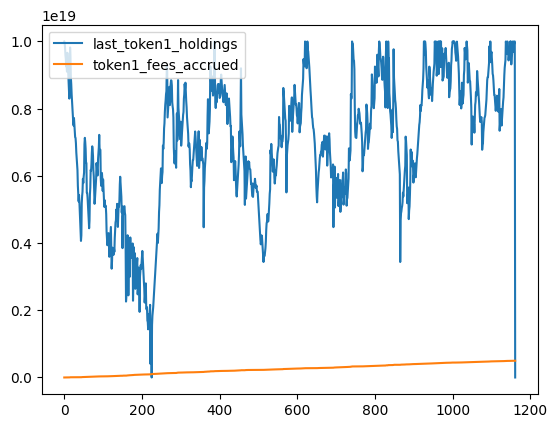

In [36]:
example_pos[['last_token1_holdings', 'token1_fees_accrued']].plot()

In [37]:
#Do they profit
#Collected - start or portfolio + fees - start, 
(example_pos['token0_collected'].iloc[-1] - example_pos['start_token0_holdings'].iloc[-1] - example_pos['increase_token0_holdings'].iloc[-1]), (example_pos['token1_collected'].iloc[-1] - example_pos['start_token1_holdings'].iloc[-1] - example_pos['increase_token1_holdings'].iloc[-1])

#the fees compensate for the portfolio returns because it was basically an option

(9.609043898074476e+19, 4.978521585319854e+17)

Other features

In [38]:
clm.view_all_pool_events()

,event,logIndex,blockNumber,transactionIndex,transactionHash,sender,amount,tickLower,tickUpper,amount0,amount1,tokenId,recipient,sqrtPriceX96,tick,liquidity
0,Mint,288,13465224,248,0xcf0c8169044407bdf4dcdf88d40134a1b78681d42ea0eff3ad1d7f90b8c2b01e,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,1.320505e+19,-53400.0,-44220.0,5.000000e+19,1.082329e+17,144454.0,NaN,NaN,NaN,NaN
1,Swap,508,13465680,291,0xc2e0862d6ea34405727e495971844134f06fbb1f594994bad2b7a1833be6afb7,0xE592427A0AEce92De3Edee1F18E0157C05861564,NaN,NaN,NaN,-4.843603e+18,3.000000e+16,NaN,0x50542121cc2612752C2cbe2155550844Fd821167,6.316294e+27,-50587.0,1.320505e+19
2,Swap,72,13465705,42,0x7630d84cb91ffd4dc7183055ae00d8525fdb3b7808d0e8f59df50e389dc8af79,0xE592427A0AEce92De3Edee1F18E0157C05861564,NaN,NaN,NaN,-7.488707e+18,5.000000e+16,NaN,0x577176494B48cE860d8a0252ee70C1E6CC526BA0,6.615386e+27,-49662.0,1.320505e+19
3,Swap,221,13465759,175,0xd03a5b27814eafb6cbc095d636a3cb580f37b79dc9006905408dc2120176e743,0xE592427A0AEce92De3Edee1F18E0157C05861564,NaN,NaN,NaN,-2.318690e+19,1.900000e+17,NaN,0x9A4dd52D7a7F5585D66660F6A84b792E8a0E7C7a,7.751934e+27,-46491.0,1.320505e+19
4,Swap,39,13465808,38,0xbf811d0987ddedad16685b4d51e46360a373bc56970d7f93073b9ef2e5f7c53b,0xDef1C0ded9bec7F1a1670819833240f027b25EfF,NaN,NaN,NaN,4.866950e+19,-3.416822e+17,NaN,0xDef1C0ded9bec7F1a1670819833240f027b25EfF,5.701897e+27,-52634.0,1.320505e+19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26417,Swap,4,16998114,1,0x310627955d5d2b3608c2fe0e6f7265b654e821065b7b16254e82698639853f69,0x98C3d3183C4b8A650614ad179A1a98be0a8d6B8E,NaN,NaN,NaN,7.774741e+19,-1.560073e+18,NaN,0x98C3d3183C4b8A650614ad179A1a98be0a8d6B8E,1.122505e+28,-39086.0,4.164983e+21
26418,Swap,154,16998587,49,0xb8203a654ac80714a674805f2bf8699da35e79e0cb6b6506ef132b7dbf16369b,0xDef1C0ded9bec7F1a1670819833240f027b25EfF,NaN,NaN,NaN,-2.567198e+18,5.169150e+16,NaN,0xe66B31678d6C16E9ebf358268a790B763C133750,1.122603e+28,-39084.0,4.164983e+21
26419,Swap,68,16998626,26,0x1f98ad403d6d19be2f3fdd5aa9be2b9272a1a6952996b5b869949dbdf49c363e,0xE592427A0AEce92De3Edee1F18E0157C05861564,NaN,NaN,NaN,2.541526e+18,-5.086805e+16,NaN,0x22F9dCF4647084d6C31b2765F6910cd85C178C18,1.122506e+28,-39086.0,4.164983e+21
26420,Swap,65,16999210,15,0x808f64d03c2ca3b7de7165018417e8caaf0a409bf0ed2b272c64756cca832536,0x98C3d3183C4b8A650614ad179A1a98be0a8d6B8E,NaN,NaN,NaN,6.713604e+19,-1.340544e+18,NaN,0x98C3d3183C4b8A650614ad179A1a98be0a8d6B8E,1.119956e+28,-39132.0,4.164983e+21


In [39]:
#view the swaps and other events by calling
clm.swaps

,event,logIndex,blockNumber,transactionIndex,transactionHash,sender,recipient,amount0,amount1,sqrtPriceX96,tick,liquidity
0,Swap,508,13465680,291,0xc2e0862d6ea34405727e495971844134f06fbb1f594994bad2b7a1833be6afb7,0xE592427A0AEce92De3Edee1F18E0157C05861564,0x50542121cc2612752C2cbe2155550844Fd821167,-4.843603e+18,3.000000e+16,6.316294e+27,-50587.0,1.320505e+19
0,Swap,72,13465705,42,0x7630d84cb91ffd4dc7183055ae00d8525fdb3b7808d0e8f59df50e389dc8af79,0xE592427A0AEce92De3Edee1F18E0157C05861564,0x577176494B48cE860d8a0252ee70C1E6CC526BA0,-7.488707e+18,5.000000e+16,6.615386e+27,-49662.0,1.320505e+19
0,Swap,221,13465759,175,0xd03a5b27814eafb6cbc095d636a3cb580f37b79dc9006905408dc2120176e743,0xE592427A0AEce92De3Edee1F18E0157C05861564,0x9A4dd52D7a7F5585D66660F6A84b792E8a0E7C7a,-2.318690e+19,1.900000e+17,7.751934e+27,-46491.0,1.320505e+19
0,Swap,39,13465808,38,0xbf811d0987ddedad16685b4d51e46360a373bc56970d7f93073b9ef2e5f7c53b,0xDef1C0ded9bec7F1a1670819833240f027b25EfF,0xDef1C0ded9bec7F1a1670819833240f027b25EfF,4.866950e+19,-3.416822e+17,5.701897e+27,-52634.0,1.320505e+19
0,Swap,252,13465939,182,0x5a88804b600f1aa4daaedae30b5558b96dc99aa3dd97ff1385d784e28f095436,0xE592427A0AEce92De3Edee1F18E0157C05861564,0x9A4dd52D7a7F5585D66660F6A84b792E8a0E7C7a,-2.202087e+19,1.300000e+17,6.479536e+27,-50077.0,1.320505e+19
...,...,...,...,...,...,...,...,...,...,...,...,...
0,Swap,4,16998114,1,0x310627955d5d2b3608c2fe0e6f7265b654e821065b7b16254e82698639853f69,0x98C3d3183C4b8A650614ad179A1a98be0a8d6B8E,0x98C3d3183C4b8A650614ad179A1a98be0a8d6B8E,7.774741e+19,-1.560073e+18,1.122505e+28,-39086.0,4.164983e+21
0,Swap,154,16998587,49,0xb8203a654ac80714a674805f2bf8699da35e79e0cb6b6506ef132b7dbf16369b,0xDef1C0ded9bec7F1a1670819833240f027b25EfF,0xe66B31678d6C16E9ebf358268a790B763C133750,-2.567198e+18,5.169150e+16,1.122603e+28,-39084.0,4.164983e+21
0,Swap,68,16998626,26,0x1f98ad403d6d19be2f3fdd5aa9be2b9272a1a6952996b5b869949dbdf49c363e,0xE592427A0AEce92De3Edee1F18E0157C05861564,0x22F9dCF4647084d6C31b2765F6910cd85C178C18,2.541526e+18,-5.086805e+16,1.122506e+28,-39086.0,4.164983e+21
0,Swap,65,16999210,15,0x808f64d03c2ca3b7de7165018417e8caaf0a409bf0ed2b272c64756cca832536,0x98C3d3183C4b8A650614ad179A1a98be0a8d6B8E,0x98C3d3183C4b8A650614ad179A1a98be0a8d6B8E,6.713604e+19,-1.340544e+18,1.119956e+28,-39132.0,4.164983e+21


In [40]:
#pool name to be able to call for the save
clm.poolAddress, clm.token0, clm.token1 

('SSV/ETH', 'SSV', 'ETH')

In [41]:
#TBC 
clm.get_liquidity_distribution()
clm.quote_price()

TypeError: ConcentratedLiquidity.quote_price() missing 2 required positional arguments: 'amount' and 'zeroForOne'

In [ ]:
#can also use the object to call the internal functions
clm.get_amounts(2, 1, 3, 1000)  #sqrtP, sqrtPA, sqrtPB, L returns amount0, amount1

(166.66666666666669, 1000)